In [1]:
pip install pandas scikit-learn transformers datasets torch matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 57.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 59.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 43.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 59.2 MB/s eta 0:00:0000:0100:01
   ━━

In [4]:
pip install transformers[torch]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.2/333.2 kB 27.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install protobuf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 20.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch
from sklearn.metrics import classification_report
import pandas as pd

df_human = pd.read_csv("human.csv")
df_ai = pd.read_csv("ai.csv")
df_paraphrased = pd.read_csv("paraphrased.csv")

df_human['label'] = 0
df_ai['label'] = 1
df_paraphrased['label'] = 2

# only abstract and label columns are required
df_human = df_human[['abstract', 'label']]
df_ai = df_ai[['abstract', 'label']]
df_paraphrased = df_paraphrased[['abstract', 'label']]

#combining all csv
df = pd.concat([df_human, df_ai, df_paraphrased], ignore_index=True)

# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

#to check count of each class to ensure it is balanced
print(df['label'].value_counts())

#dataset split into 80% train and 20% test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print(f"Training Set Size: {len(train_df)}")
print(f"Test Set Size: {len(test_df)}")


/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


label
1    15395
2    15395
0    15391
Name: count, dtype: int64
Training Set Size: 36944
Test Set Size: 9237


In [2]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU instead.")

Using GPU: NVIDIA GeForce RTX 4090


Map: 100%|██████████| 9237/9237 [00:07<00:00, 1234.74 examples/s]
/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Testing combination: lr=1e-05, batch_size=8, epochs=3, weight_decay=0.01


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss,Accuracy,F1 Macro
500,0.398500,0.835097,0.756306,0.749219
1000,0.374600,1.074011,0.745480,0.730444
1500,0.327000,0.497634,0.887842,0.886610
2000,0.254000,0.676724,0.853091,0.851870
2500,0.248800,0.859732,0.830573,0.824147
3000,0.211400,0.686660,0.869222,0.866424
3500,0.312000,0.471373,0.906247,0.905445
4000,0.287100,0.365018,0.922161,0.921805
4500,0.255900,0.542315,0.893147,0.892631
5000,0.145800,0.748213,0.874202,0.873422


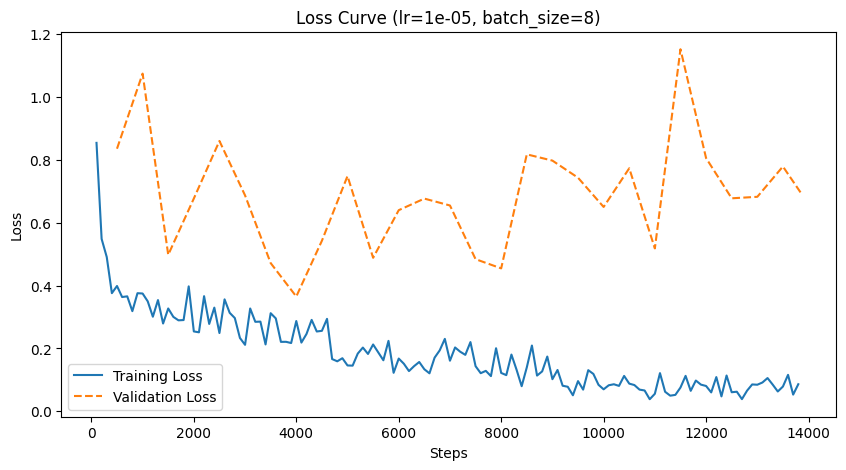

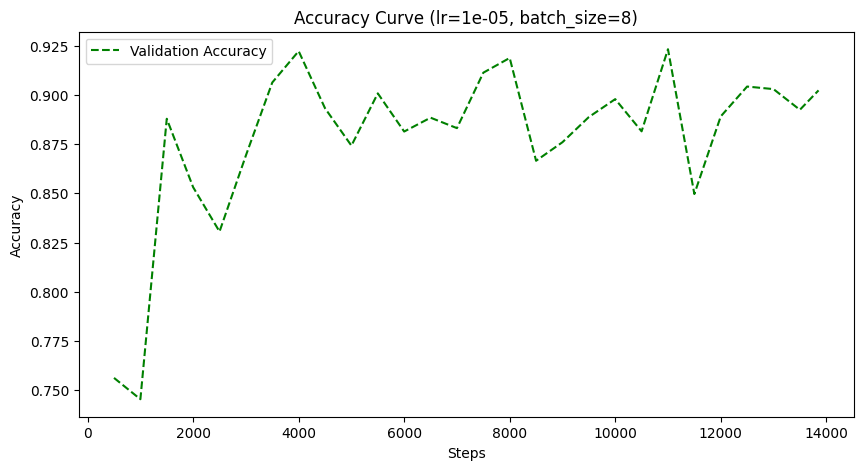

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Testing combination: lr=1e-05, batch_size=16, epochs=3, weight_decay=0.01


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss,Accuracy,F1 Macro
500,0.294400,0.881259,0.722421,0.715331
1000,0.213000,0.794351,0.785969,0.773241
1500,0.176500,0.496457,0.856447,0.853650
2000,0.196700,0.540918,0.871928,0.868708
2500,0.164700,0.453071,0.894663,0.893991
3000,0.128300,0.784238,0.846270,0.842429
3500,0.136100,0.653841,0.876800,0.874671
4000,0.131000,0.453321,0.910794,0.909957
4500,0.116600,1.025804,0.821695,0.819884
5000,0.064900,0.604106,0.896070,0.895527


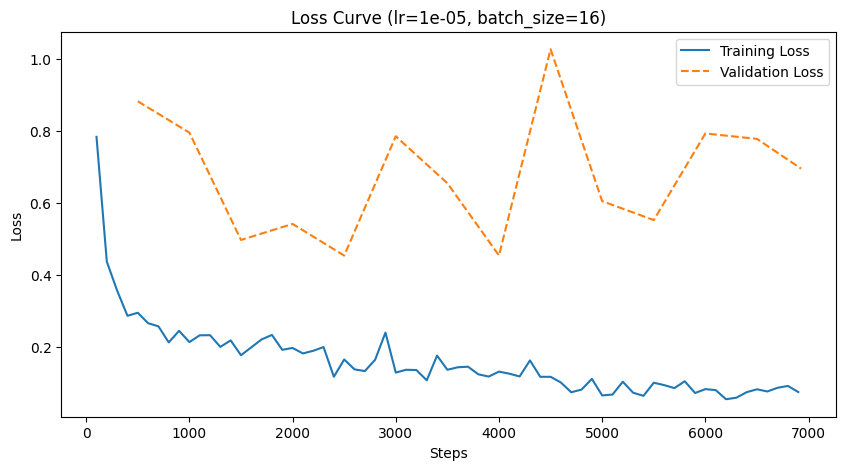

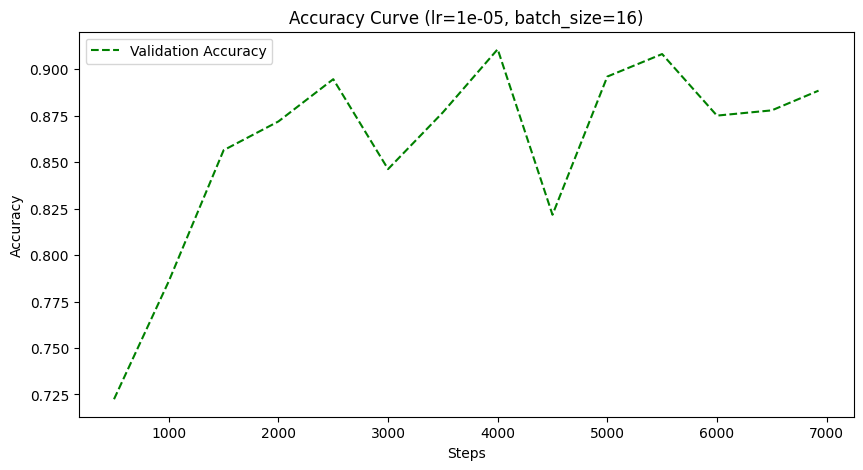

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Testing combination: lr=1e-05, batch_size=32, epochs=3, weight_decay=0.01


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss,Accuracy,F1 Macro
500,0.213200,0.958929,0.729241,0.721970
1000,0.166700,0.280540,0.899101,0.898255
1500,0.126600,0.738780,0.809354,0.806555
2000,0.102400,0.453249,0.876150,0.875373
2500,0.075700,0.407459,0.904298,0.903710
3000,0.076400,0.742889,0.854931,0.853460


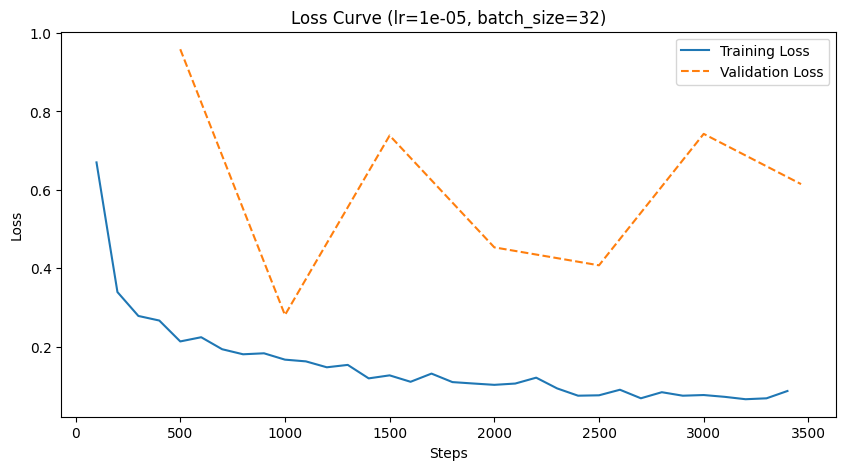

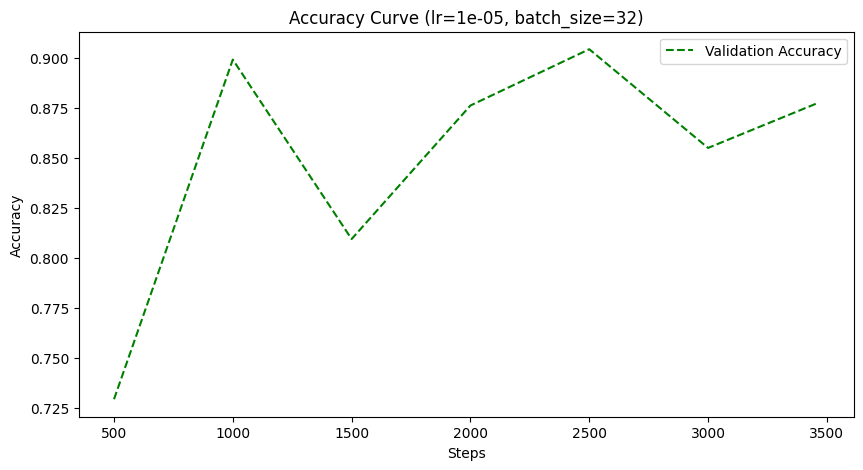

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Testing combination: lr=2e-05, batch_size=8, epochs=3, weight_decay=0.01


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss,Accuracy,F1 Macro
500,0.458500,0.434986,0.810761,0.805300
1000,0.405000,0.687974,0.841074,0.837855
1500,0.353200,0.635972,0.855256,0.851327
2000,0.331000,0.362166,0.908737,0.908181
2500,0.281900,0.594607,0.880372,0.878624
3000,0.212600,0.695809,0.873552,0.870845
3500,0.334300,0.530579,0.886868,0.885326
4000,0.268400,0.381668,0.915665,0.915245
4500,0.250200,0.421420,0.903432,0.902939
5000,0.128400,0.529298,0.910361,0.909712


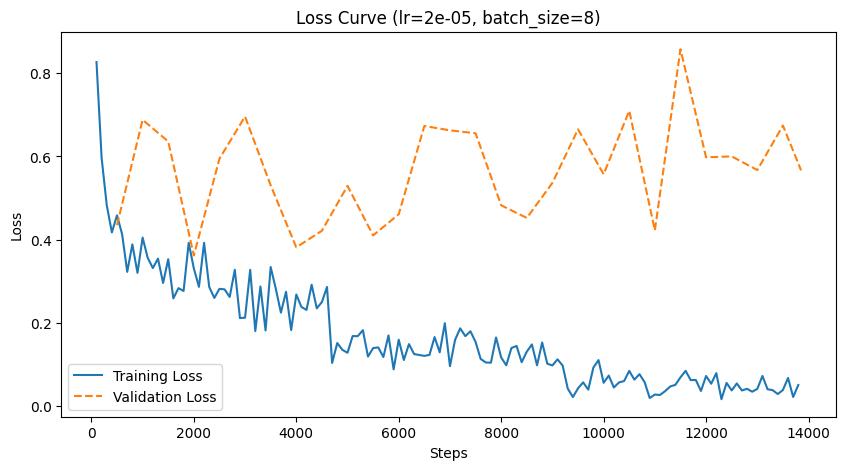

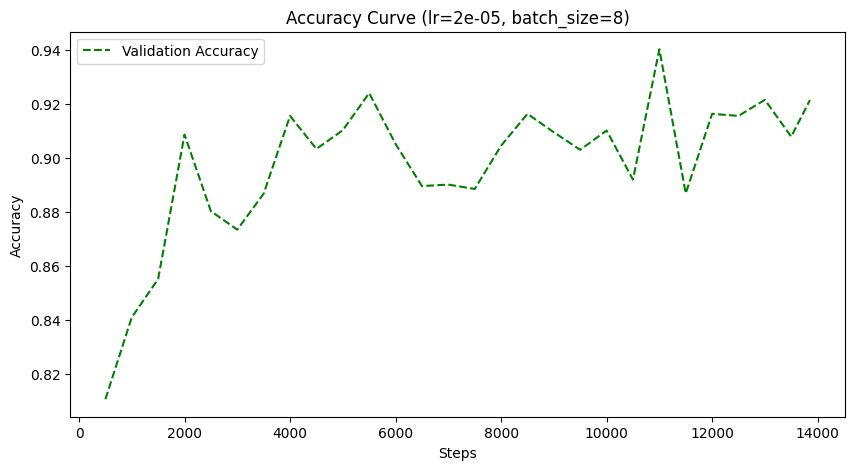

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Testing combination: lr=2e-05, batch_size=16, epochs=3, weight_decay=0.01


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss,Accuracy,F1 Macro
500,0.300700,0.844190,0.740500,0.723413
1000,0.225300,0.271662,0.922810,0.922473
1500,0.192500,0.439761,0.865974,0.863927
2000,0.172500,0.519250,0.875501,0.872364
2500,0.132500,0.475077,0.903865,0.903356
3000,0.101100,0.467299,0.908520,0.906902
3500,0.111500,0.656039,0.881238,0.878621
4000,0.103400,0.367428,0.930497,0.930095
4500,0.071400,0.662786,0.890116,0.889386
5000,0.038600,0.620643,0.898777,0.898288


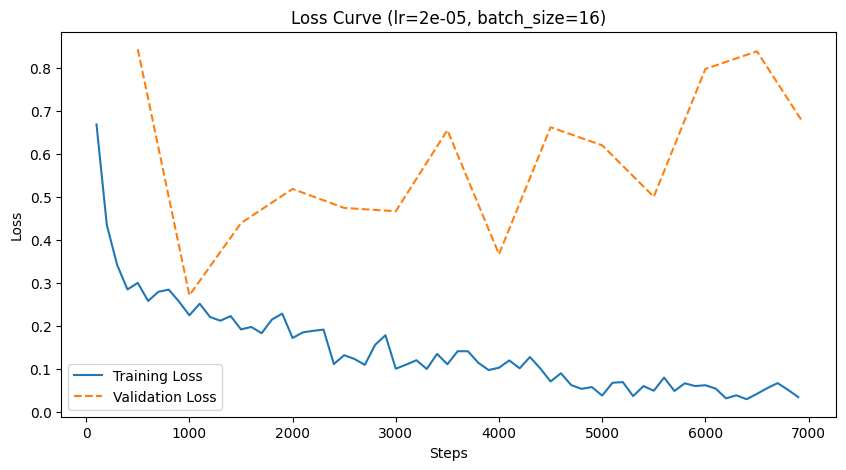

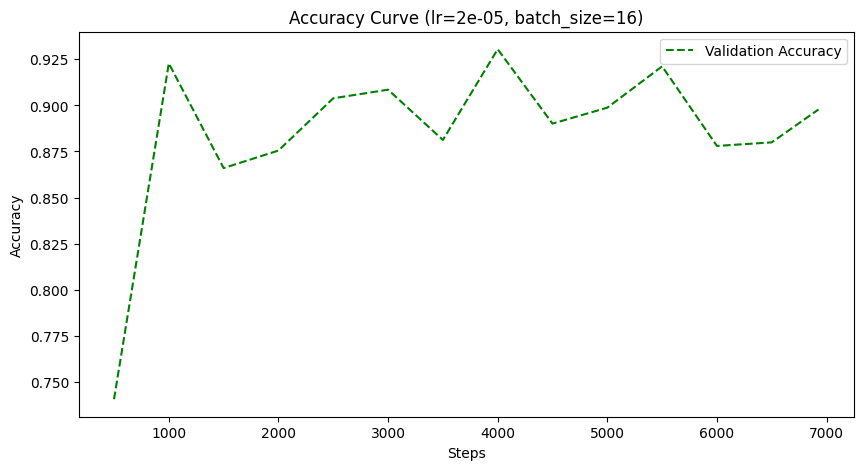

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Testing combination: lr=2e-05, batch_size=32, epochs=3, weight_decay=0.01


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss,Accuracy,F1 Macro
500,0.211400,0.523814,0.835553,0.833637
1000,0.164100,0.176608,0.934719,0.934064
1500,0.119400,0.604433,0.851575,0.850405
2000,0.092800,0.389894,0.897586,0.896806
2500,0.055100,0.513289,0.899318,0.898287
3000,0.045800,0.564965,0.899318,0.898648


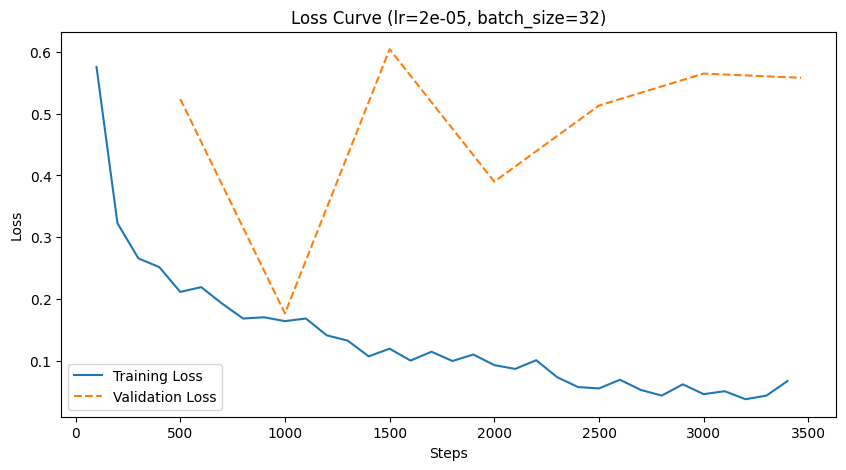

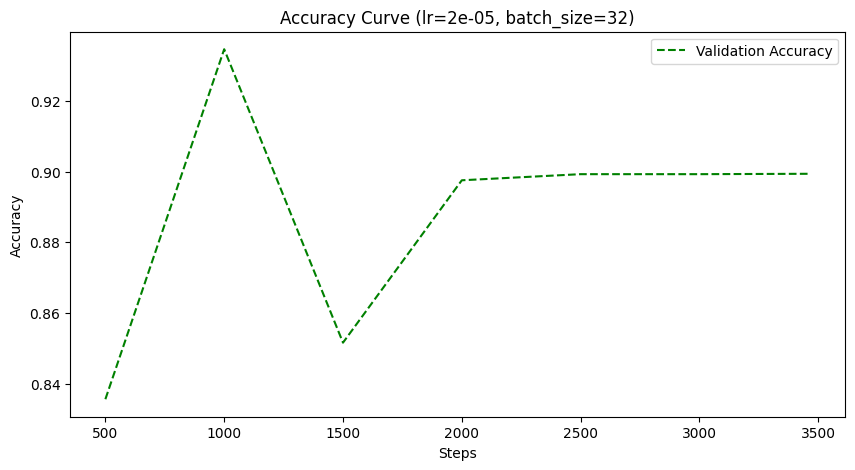

   learning_rate  batch_size  num_epochs  weight_decay  accuracy  f1_macro
3        0.00002           8           3          0.01  0.921511  0.920972
0        0.00001           8           3          0.01  0.902241  0.901469
5        0.00002          32           3          0.01  0.899426  0.898556
4        0.00002          16           3          0.01  0.897802  0.897054
1        0.00001          16           3          0.01  0.888492  0.887639


In [5]:
import pandas as pd
from transformers import Trainer, TrainingArguments
from sklearn.metrics import classification_report
from datasets import DatasetDict, Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import numpy as np
import os
import matplotlib.pyplot as plt

os.environ["WANDB_DISABLED"] = "true"

# Hyperparameters
learning_rates = [1e-5, 2e-5]
batch_sizes = [8, 16, 32]
num_epochs = [3]
weight_decays = [0.01]

# Tokenizer and dataset setup
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_function(examples):
    return tokenizer(examples['abstract'], padding="max_length", truncation=True, max_length=512)

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

dataset = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})

tokenized_datasets = dataset.map(tokenize_function, batched=True)

results = []

# Iterate through the hyperparameter grid
for lr in learning_rates:
    for batch_size in batch_sizes:
        for epochs in num_epochs:
            for weight_decay in weight_decays:
                print(f"Testing combination: lr={lr}, batch_size={batch_size}, epochs={epochs}, weight_decay={weight_decay}")

                # Training arguments
                training_args = TrainingArguments(
                    output_dir='./results',
                    evaluation_strategy="steps",
                    eval_steps=500,
                    logging_dir='./logs',
                    logging_steps=100,
                    save_strategy="epoch",
                    learning_rate=lr,
                    per_device_train_batch_size=batch_size,
                    per_device_eval_batch_size=batch_size,
                    num_train_epochs=epochs,
                    weight_decay=weight_decay,
                    disable_tqdm=False
                )

                # Model initialization
                model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3)

                # Define custom compute metrics function
                def compute_metrics(eval_pred):
                    logits, labels = eval_pred
                    predictions = np.argmax(logits, axis=-1)
                    report = classification_report(labels, predictions, output_dict=True)
                    metrics = {
                        "accuracy": report["accuracy"],
                        "f1_macro": report["macro avg"]["f1-score"]
                    }
                    return metrics

                # Trainer
                trainer = Trainer(
                    model=model,
                    args=training_args,
                    train_dataset=tokenized_datasets['train'],
                    eval_dataset=tokenized_datasets['test'],
                    compute_metrics=compute_metrics
                )

                # Train and save history
                trainer.train()
                history = trainer.state.log_history

                # Evaluate
                eval_results = trainer.evaluate()
                predictions = trainer.predict(tokenized_datasets['test'])
                preds = predictions.predictions.argmax(axis=-1)
                report = classification_report(tokenized_datasets['test']['label'], preds, output_dict=True)

                # Save results
                results.append({
                    "learning_rate": lr,
                    "batch_size": batch_size,
                    "num_epochs": epochs,
                    "weight_decay": weight_decay,
                    "accuracy": report["accuracy"],
                    "f1_macro": report["macro avg"]["f1-score"]
                })

                # Plot training/validation loss and accuracy
                steps = [log.get("step", 0) for log in history if "loss" in log]
                training_loss = [log.get("loss", None) for log in history if "loss" in log]
                eval_steps = [log.get("step", 0) for log in history if "eval_loss" in log]
                eval_loss = [log.get("eval_loss", None) for log in history if "eval_loss" in log]
                eval_accuracy = [log.get("eval_accuracy", None) for log in history if "eval_accuracy" in log]

                # Plot loss curve
                plt.figure(figsize=(10, 5))
                plt.plot(steps, training_loss, label="Training Loss")
                plt.plot(eval_steps, eval_loss, label="Validation Loss", linestyle="--")
                plt.xlabel("Steps")
                plt.ylabel("Loss")
                plt.title(f"Loss Curve (lr={lr}, batch_size={batch_size})")
                plt.legend()
                plt.savefig(f"loss_curve_roberta_lr{lr}_bs{batch_size}.png")
                plt.show()

                # Plot accuracy curve
                if eval_accuracy:
                    plt.figure(figsize=(10, 5))
                    plt.plot(eval_steps, eval_accuracy, label="Validation Accuracy", linestyle="--", color="g")
                    plt.xlabel("Steps")
                    plt.ylabel("Accuracy")
                    plt.title(f"Accuracy Curve (lr={lr}, batch_size={batch_size})")
                    plt.legend()
                    plt.savefig(f"accuracy_curve_roberta_lr{lr}_bs{batch_size}.png")
                    plt.show()

# Save all results to a CSV
results_df = pd.DataFrame(results)
results_df.to_csv("Roberta_hyperparameter_results.csv", index=False)

print(results_df.sort_values(by="f1_macro", ascending=False).head())

In [6]:
results_df

,learning_rate,batch_size,num_epochs,weight_decay,accuracy,f1_macro
0,0.00001,8,3,0.01,0.902241,0.901469
1,0.00001,16,3,0.01,0.888492,0.887639
2,0.00001,32,3,0.01,0.877558,0.876301
3,0.00002,8,3,0.01,0.921511,0.920972
4,0.00002,16,3,0.01,0.897802,0.897054
5,0.00002,32,3,0.01,0.899426,0.898556
